In [1]:

#import required python packages
import pandas as pd
import numpy as np
import glob,os
import matplotlib.dates as mdates

#to plot in the notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

#download the data and import into df
import pandas_datareader as pdr
from datetime import datetime
import statsmodels.regression.linear_model as rg
#import arch.unitroot as at

We need to extract various types of Crypto Currencies for this project. The best ones can be found from the source given below various Cryptocurrencies are taken into the dataframes using pandas_datareader.

Source: https://finance.yahoo.com/news/top-10-cryptocurrencies-market-capitalisation-160046487.html

The above article analyses the top 10 cryptocurrencies by market capitalisation.

Beginning with the largest, the top 10 are currently Bitcoin ($BTC), Ethereum ($ETH), XRP ($XRP), Tether ($USDT), Bitcoin Cash ($BCH) , Litecoin ($LTC), EOS ($EOS), Binance Coin ($BNB), Bitcoin SV ($BSV) and Tezos ($XTZ).

Bitcoin (BTC) $128bn

Ethereum (ETH) $19.4bn

XRP (XRP) $8.22bn

Tether (USDT) $6.4bn

Bitcoin Cash (BCH) $4.1bn

Bitcoin SV (BSV) $3.4bn

Litecoin (LTC) $2.6bn

EOS (EOS) $2.4bn

Binance Coin (BNB) $2.4bn

Tezos (XTZ) $1.5bn

In [2]:
## Downloading and assembling the data for the project 

curr = ['BTC-USD','ETH-USD','XRP-USD','BCH-USD','USDT-USD','BSV-USD', 'LTC-USD','EOS-USD','BNB-USD','XTZ-USD']

BTC = pdr.get_data_yahoo(symbols='BTC-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
ETH = pdr.get_data_yahoo(symbols='ETH-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
XRP = pdr.get_data_yahoo(symbols='XRP-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
BCH = pdr.get_data_yahoo(symbols='BCH-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
USDT = pdr.get_data_yahoo(symbols='USDT-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
LTC = pdr.get_data_yahoo(symbols='LTC-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
EOS = pdr.get_data_yahoo(symbols='EOS-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))
BNB = pdr.get_data_yahoo(symbols='BNB-USD', start=datetime(2019, 1, 1), end=datetime(2021, 3, 1))

data= pd.concat([BTC['Adj Close'],ETH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XRP['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BCH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,USDT['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,LTC['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,EOS['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BNB['Adj Close']], ignore_index=True,axis=1)


data.columns = [ 'BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ']

data.head()

,BTC_ADJ,ETH_ADJ,XRP_ADJ,BCH_ADJ,USDT_ADJ,LTC_ADJ,EOS_ADJ,BNB_ADJ
Date,,,,,,,,
2019-01-01,3843.520020,140.819412,0.364771,164.854599,1.018335,31.979931,2.663533,6.075273
2019-01-02,3943.409424,155.047684,0.375243,171.827377,1.024012,33.433681,2.887629,6.188613
2019-01-03,3836.741211,149.135010,0.360224,162.049927,1.019473,32.026699,2.681411,5.903535
2019-01-04,3857.717529,154.581940,0.356747,161.395630,1.017200,32.404167,2.721645,6.065138
2019-01-05,3845.194580,155.638596,0.355275,160.401215,1.018489,34.936867,2.699468,6.065543


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


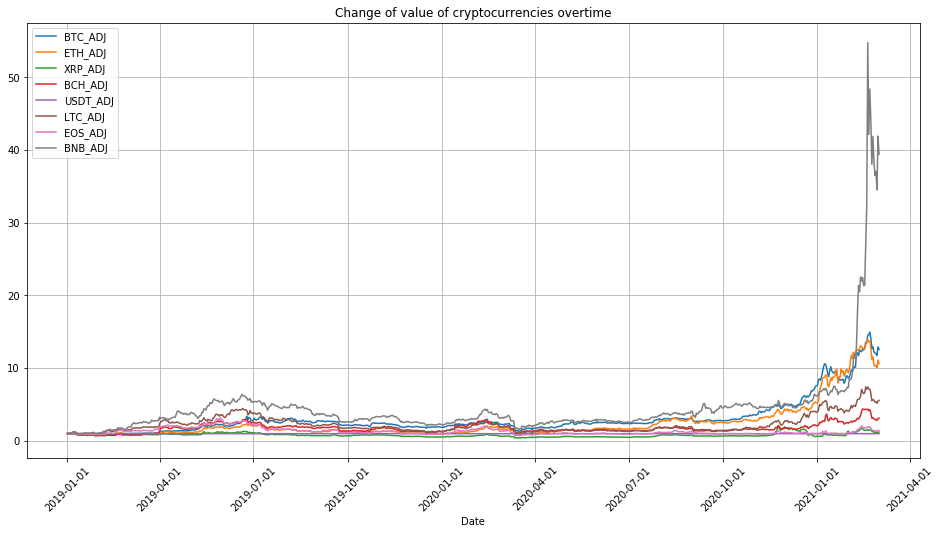

In [3]:
# We need to normalize the values to project them on a visualization plot for better understanding of the datd

prices_norm = data.divide(data.iloc[0]) # divide them with the highest which is BTC

curr = ['BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ']

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = plt.axes()
plt.plot(prices_norm)
plt.title('Change of value of cryptocurrencies overtime')
plt.legend(curr)
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)

plt.show()

We can observe that some currencies performed well compared to others. Almost all the currencies values fell when the Corona Pandemic started in March in USA. But later in August this year all the currencies values increased drastically.

In [4]:
#Normalizing the dataframe and get percentage change values 
data=pd.DataFrame(data)

def normalize_series(data):
    #take tail to drop head NA
    return data.pct_change(1).dropna()
dt=normalize_series(data)

#remove first row with NAs
dt=dt.tail(len(dt)-1)
dt.columns = [ 'BTC_RET','ETH_RET','XRP_RET','BCH_RET','USDT_RET','LTC_RET','EOS_RET','BNB_RET']
dt['BTC_RET'].head()

Date
2019-01-03   -0.027050
2019-01-04    0.005467
2019-01-05   -0.003246
2019-01-06    0.060189
2019-01-07   -0.012605
Name: BTC_RET, dtype: float64

In [5]:
# Normalizing to get the cumulative returns in a  datafrme 
def normalize_and_accumulate_series(data):
    #take tail to drop head NA
    return data.pct_change(1).cumsum().dropna()
dtc = normalize_and_accumulate_series(data)
dtc.info() #describes the information in the dataset

#remove first row with NAs
dtc = dtc.tail(len(dt)-1)
dtc.columns = ['BTC_C.RET','ETH_C.RET','XRP_C.RET','BCH_C.RET','USDT_C.RET','LTC_C.RET','EOS_C.RET','BNB_C.RET']
dtc['BTC_C.RET'].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 787 entries, 2019-01-02 to 2021-03-02
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC_ADJ   787 non-null    float64
 1   ETH_ADJ   787 non-null    float64
 2   XRP_ADJ   787 non-null    float64
 3   BCH_ADJ   787 non-null    float64
 4   USDT_ADJ  787 non-null    float64
 5   LTC_ADJ   787 non-null    float64
 6   EOS_ADJ   787 non-null    float64
 7   BNB_ADJ   787 non-null    float64
dtypes: float64(8)
memory usage: 55.3 KB


Date
2019-01-04    0.004407
2019-01-05    0.001160
2019-01-06    0.061349
2019-01-07    0.048745
2019-01-08    0.050136
Name: BTC_C.RET, dtype: float64

In [6]:
dt.describe()

,BTC_RET,ETH_RET,XRP_RET,BCH_RET,USDT_RET,LTC_RET,EOS_RET,BNB_RET
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.003959,0.004075,0.001749,0.003013,-0.000018,0.003461,0.001708,0.006248
std,0.038609,0.047940,0.056566,0.056602,0.004667,0.051501,0.052342,0.057785
min,-0.371695,-0.423472,-0.423340,-0.429560,-0.051212,-0.361773,-0.396028,-0.419046
25%,-0.011658,-0.017393,-0.017965,-0.020292,-0.001779,-0.023367,-0.018265,-0.018546
50%,0.001892,0.001649,-0.000991,-0.000362,-0.000132,0.001223,0.001028,0.001717
75%,0.018410,0.025622,0.017576,0.025987,0.001644,0.025472,0.021023,0.028889
max,0.188647,0.259475,0.560109,0.397751,0.054845,0.308295,0.231599,0.697604


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


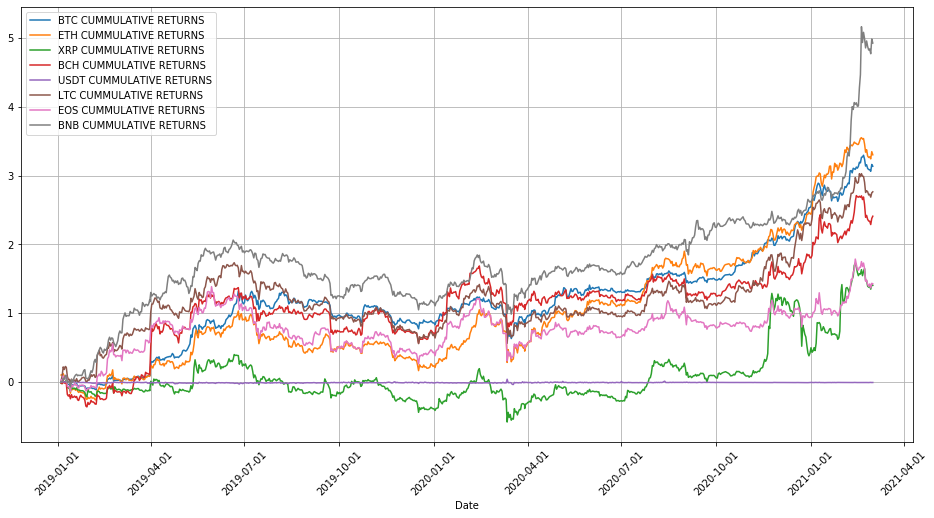

In [7]:
# The Cummulative returns Plot to get the data based on rate of change

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = plt.axes()
plt.plot(dtc['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dtc['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.plot(dtc['XRP_C.RET'],label='XRP CUMMULATIVE RETURNS')
plt.plot(dtc['BCH_C.RET'],label='BCH CUMMULATIVE RETURNS')
plt.plot(dtc['USDT_C.RET'],label='USDT CUMMULATIVE RETURNS')
plt.plot(dtc['LTC_C.RET'],label='LTC CUMMULATIVE RETURNS')
plt.plot(dtc['EOS_C.RET'],label='EOS CUMMULATIVE RETURNS')
plt.plot(dtc['BNB_C.RET'],label='BNB CUMMULATIVE RETURNS')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')

plt.show()

Two main criteria that would determine the desired pair are the correlation value and Cointegration. The pair with the highest correlation, is the desired pair. High positive correlation means that the returns of both currencies are going towards same direction. Conintegration values should be low for a desired value. values less than 0.05 are better.

First we attempted to get the p-value of all possible pair in our selected

In [8]:
#obtaining the P-value for every possible pair within our selected
#for cointegration test

# A p-value is a measure of the probability that an observed difference could have occurred just by random chance.
# The lower the p-value, the greater the statistical significance of the observed difference.
from statsmodels.tsa.stattools import coint
import scipy

#co- integration test
for p1 in dt.columns:
    
    for p2 in dt.columns:
        
        if p1 != p2:
            test_result = coint(dt[p1], dt[p2])
            #print(test_result)
            print(p1 + ' and ' + p2 + ': p-value = ' + str(test_result[1]))
            

BTC_RET and ETH_RET: p-value = 1.690208123481726e-15
BTC_RET and XRP_RET: p-value = 0.0
BTC_RET and BCH_RET: p-value = 1.4788794710759093e-27
BTC_RET and USDT_RET: p-value = 0.0
BTC_RET and LTC_RET: p-value = 2.9518099339322776e-10
BTC_RET and EOS_RET: p-value = 1.188370021914171e-16
BTC_RET and BNB_RET: p-value = 5.004388206508206e-16
ETH_RET and BTC_RET: p-value = 8.070421898973659e-10
ETH_RET and XRP_RET: p-value = 2.6970708925670037e-06
ETH_RET and BCH_RET: p-value = 0.0
ETH_RET and USDT_RET: p-value = 1.9065032462350248e-11
ETH_RET and LTC_RET: p-value = 2.0690440429275352e-29
ETH_RET and EOS_RET: p-value = 6.657311046056124e-24
ETH_RET and BNB_RET: p-value = 1.0586986003094626e-07
XRP_RET and BTC_RET: p-value = 0.0
XRP_RET and ETH_RET: p-value = 3.846720745389461e-06
XRP_RET and BCH_RET: p-value = 1.3150819350103767e-05
XRP_RET and USDT_RET: p-value = 0.0
XRP_RET and LTC_RET: p-value = 0.0
XRP_RET and EOS_RET: p-value = 0.0
XRP_RET and BNB_RET: p-value = 0.0
BCH_RET and BTC_RET: 

Desired value for Co integration test is value of p less than 0.05,

Looks like all the currencies have less value against each other, so all of them passed the test.

In [9]:
# Correlation values
# more correlation is desired for te better relation between dimensions
def corr(data1,data2):
    mean1=data1.mean()
    mean2=data2.mean()
    std1= data1.std()
    std2= data2.std() 
    corr =((data1*data2).mean()-mean1*mean2)/(std1*std2)   # Formula: Covariance / SD1 * SD2 #Covariance = MEAN(D1,D2)-MEAN(D1)*MEAN(D2)
    return corr

In [10]:
#CORRELATION MATRIX
CORELATION = dt.corr()
dt.corr()

,BTC_RET,ETH_RET,XRP_RET,BCH_RET,USDT_RET,LTC_RET,EOS_RET,BNB_RET
BTC_RET,1.000000,0.806249,0.522467,0.762366,-0.045800,0.774081,0.719270,0.584630
ETH_RET,0.806249,1.000000,0.597710,0.795379,-0.094549,0.820737,0.790085,0.605357
XRP_RET,0.522467,0.597710,1.000000,0.581994,-0.046188,0.576590,0.661211,0.434651
BCH_RET,0.762366,0.795379,0.581994,1.000000,-0.059388,0.816086,0.827690,0.547705
USDT_RET,-0.045800,-0.094549,-0.046188,-0.059388,1.000000,-0.064698,-0.051851,-0.082944
LTC_RET,0.774081,0.820737,0.576590,0.816086,-0.064698,1.000000,0.819589,0.594051
EOS_RET,0.719270,0.790085,0.661211,0.827690,-0.051851,0.819589,1.000000,0.594133
BNB_RET,0.584630,0.605357,0.434651,0.547705,-0.082944,0.594051,0.594133,1.000000


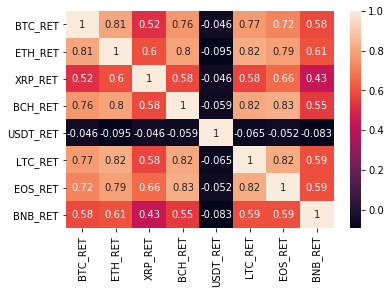

In [11]:
sn.heatmap(CORELATION, annot=True)

Off all the currencies chosen above USDT has bad correlation with all other currencies.
Ethereum has the best correlation with the other currencies, i.e, Litecoin and Bitcoin.

We will analyse more on the correlation between BTC and ETH.

In [12]:
BTC.to_csv(r'.\BTC.csv',index='Date')
btc = pd.read_csv("./BTC.csv")

ETH.to_csv(r'.\ETH.csv',index='Date')
eth = pd.read_csv("./ETH.csv")

In [13]:
#lets save other files too
XRP.to_csv(r'.\XRP.csv',index='Date')
xrp = pd.read_csv("./XRP.csv")

BCH.to_csv(r'.\BCH.csv',index='Date')
bch = pd.read_csv("./BCH.csv")

USDT.to_csv(r'.\USDT.csv',index='Date')
usdt = pd.read_csv("./USDT.csv")

LTC.to_csv(r'.\LTC.csv',index='Date')
ltc = pd.read_csv("./LTC.csv")

EOS.to_csv(r'.\EOS.csv',index='Date')
eos = pd.read_csv("./EOS.csv")

BNB.to_csv(r'.\BNB.csv',index='Date')
bnb = pd.read_csv("./BNB.csv")

In [14]:
btc

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
1,2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2,2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
3,2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
4,2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580
...,...,...,...,...,...,...,...
783,2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,3.509679e+11,46339.761719
784,2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,4.591095e+10,46188.453125
785,2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,5.344389e+10,45137.769531
786,2021-03-01,49784.015625,45115.093750,45159.503906,49631.242188,5.389130e+10,49631.242188


In [15]:
btc.shape

(788, 7)

In [16]:
eth.shape

(788, 7)

In [17]:
df2 = pd.concat([btc['Date'],btc['Adj Close']], ignore_index=False,axis=1)
df2 = pd.concat([df2,eth['Adj Close'],eth['Date']], ignore_index=False,axis=1)


#check for NAs
#df4= df2.dropna(axis=1,how='any')

#change column names
df2.columns = ['Date', 'btc', 'eth','Date2']

In [18]:
df2.set_index('Date2')

,Date,btc,eth
Date2,,,
2019-01-01,2019-01-01,3843.520020,140.819412
2019-01-02,2019-01-02,3943.409424,155.047684
2019-01-03,2019-01-03,3836.741211,149.135010
2019-01-04,2019-01-04,3857.717529,154.581940
2019-01-05,2019-01-05,3845.194580,155.638596
...,...,...,...
2021-02-26,2021-02-26,46339.761719,1446.033691
2021-02-27,2021-02-27,46188.453125,1459.973145
2021-02-28,2021-02-28,45137.769531,1416.048950


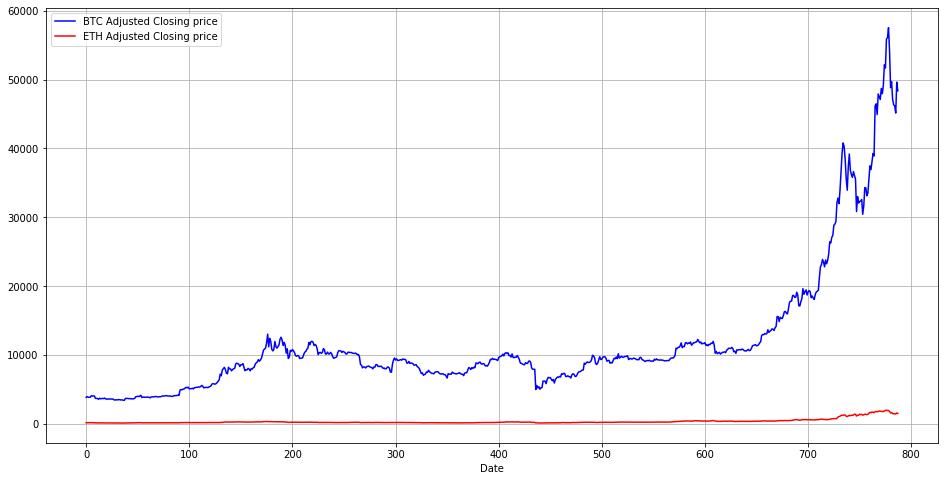

In [19]:
#plotting

plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(df2['btc'],color='blue',  label='BTC Adjusted Closing price')
plt.plot(df2['eth'],color='red',  label='ETH Adjusted Closing price')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

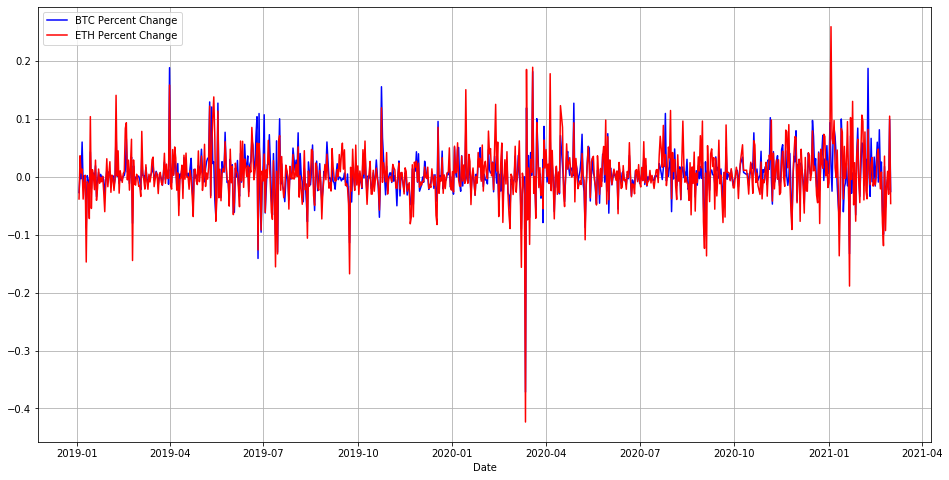

In [20]:
#plot the return values
plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(dt['BTC_RET'],color='blue',  label='BTC Percent Change')
plt.plot(dt['ETH_RET'],color='red',  label='ETH Percent Change')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

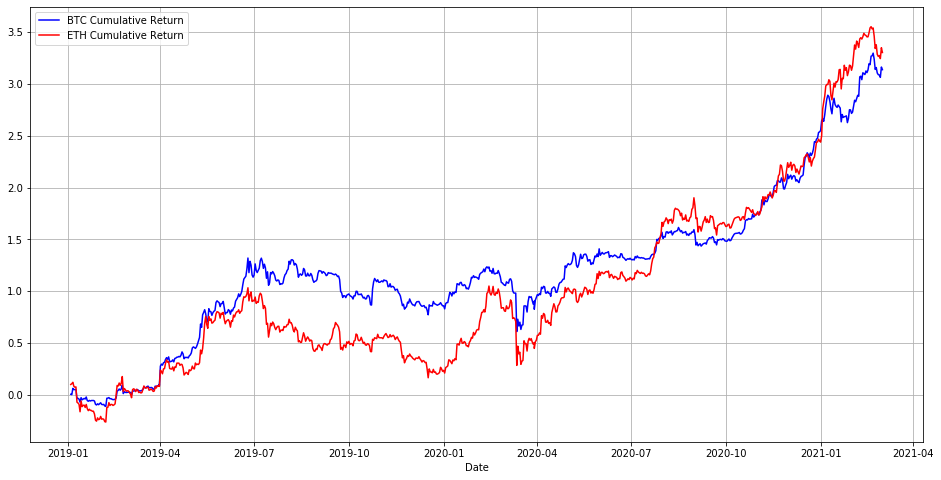

In [21]:
#plot the return values
plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(dtc['BTC_C.RET'],color='blue',  label='BTC Cumulative Return')
plt.plot(dtc['ETH_C.RET'],color='red',  label='ETH Cumulative Return')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

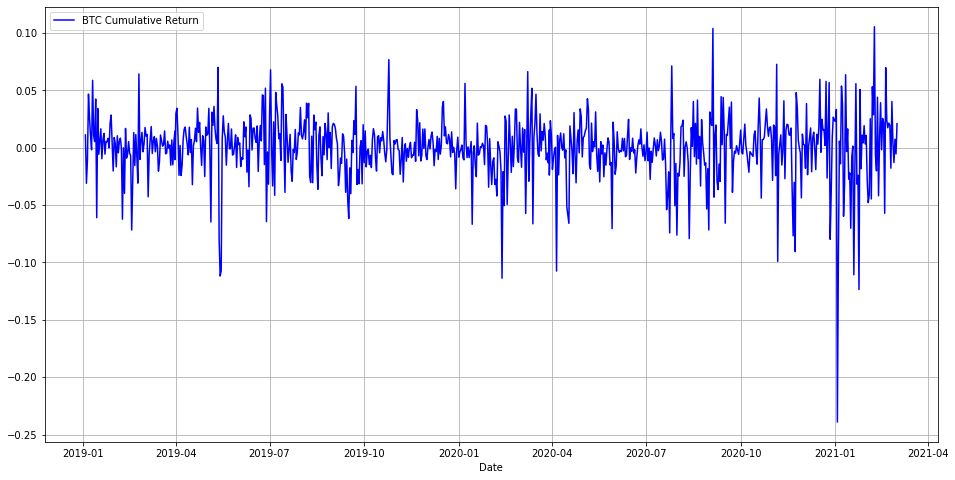

In [22]:
BTC_ETH = dt['BTC_RET'] - dt['ETH_RET']

plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(BTC_ETH,color='blue',  label='BTC Cumulative Return')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

In [23]:
BTC_DATA = pd.concat([btc['Date'],btc['Adj Close']], ignore_index=False,axis=1)

In [24]:
BTC_DATA.set_index('Date', inplace = True)

In [25]:
BTC_DATA.columns = ['BTC_Close']

In [26]:
BTC_DATA

,BTC_Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580
...,...
2021-02-26,46339.761719
2021-02-27,46188.453125
2021-02-28,45137.769531


In [27]:
#Lets split the dataset into train and test dataset
BTC_train = BTC_DATA[:500]
BTC_test = BTC_DATA[500:]

Lets Implement LSTM on this Dataset

In [28]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(BTC_DATA)
scaled_data[0,0]

0.008201781588675072

In [29]:
#setting training and testing data

x_train, y_train = [], []
for i in range(80,len(BTC_train)):
    x_train.append(scaled_data[i-80:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train[1])
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape

[0.01004679 0.00807657 0.00846402 0.00823271 0.01250748 0.01155839
 0.01166182 0.01174398 0.00516163 0.00531753 0.00483611 0.00283487
 0.00566269 0.00427044 0.00471985 0.00515497 0.00477217 0.00607857
 0.00372258 0.00326116 0.00378839 0.00342907 0.00371984 0.00369953
 0.0037493  0.00340769 0.00131101 0.0008985  0.00160157 0.00107722
 0.00163415 0.00224581 0.00119212 0.00110236 0.00123541 0.00026406
 0.         0.00493732 0.00501902 0.00536967 0.00459839 0.00469255
 0.00429621 0.00401565 0.00408824 0.00425404 0.00506764 0.00953524
 0.01011485 0.01108873 0.01024458 0.01119412 0.01372458 0.00759055
 0.00892539 0.00840196 0.00834082 0.00840986 0.00849849 0.00858772
 0.00826931 0.00668789 0.00917804 0.00931782 0.00945712 0.00926589
 0.01041443 0.01019807 0.00934154 0.00941411 0.00936906 0.0096951
 0.01037005 0.01199203 0.01155803 0.01169247 0.01240696 0.01270777
 0.01163372 0.01153475]


(420, 80, 1)

In [30]:
#LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(units=13, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=13, batch_size=1, verbose=2)

Using TensorFlow backend.


Epoch 1/13
 - 18s - loss: 7.6878e-04 - accuracy: 0.0000e+00
Epoch 2/13
 - 15s - loss: 3.4231e-04 - accuracy: 0.0000e+00
Epoch 3/13
 - 15s - loss: 2.2031e-04 - accuracy: 0.0000e+00
Epoch 4/13
 - 15s - loss: 1.9261e-04 - accuracy: 0.0000e+00
Epoch 5/13
 - 15s - loss: 1.6889e-04 - accuracy: 0.0000e+00
Epoch 6/13
 - 15s - loss: 1.6646e-04 - accuracy: 0.0000e+00
Epoch 7/13
 - 15s - loss: 1.4520e-04 - accuracy: 0.0000e+00
Epoch 8/13
 - 15s - loss: 1.4010e-04 - accuracy: 0.0000e+00
Epoch 9/13
 - 15s - loss: 1.2591e-04 - accuracy: 0.0000e+00
Epoch 10/13
 - 15s - loss: 1.2241e-04 - accuracy: 0.0000e+00
Epoch 11/13
 - 15s - loss: 1.2524e-04 - accuracy: 0.0000e+00
Epoch 12/13
 - 20s - loss: 1.0679e-04 - accuracy: 0.0000e+00
Epoch 13/13
 - 15s - loss: 1.1249e-04 - accuracy: 0.0000e+00


In [31]:
# 2.4.3  predicting 122 values, using past 80 from the train data
inputs = BTC_DATA[len(BTC_DATA) - len(BTC_test) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [32]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 13)            780       
_________________________________________________________________
lstm_2 (LSTM)                (None, 3)                 204       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 988
Trainable params: 988
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# 2.4.4 setting the traning and testing range for the LSTM 
X_test = []
for i in range(80,inputs.shape[0]):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_priceL = model.predict(X_test)
closing_priceL = scaler.inverse_transform(closing_priceL)

(288, 80)


In [34]:
# 2.4.5 RMSE for the LSTM 
rms=np.sqrt(np.mean(np.power((BTC_test['BTC_Close'].values-closing_priceL),2)))
rms

15987.75941249772

In [35]:
# 2.4.6 MAPE for the LSTM 
mape = np.mean(np.abs(closing_priceL - BTC_test['BTC_Close'].values)/np.abs(BTC_test['BTC_Close'].values))
mape

0.6454335024137967

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


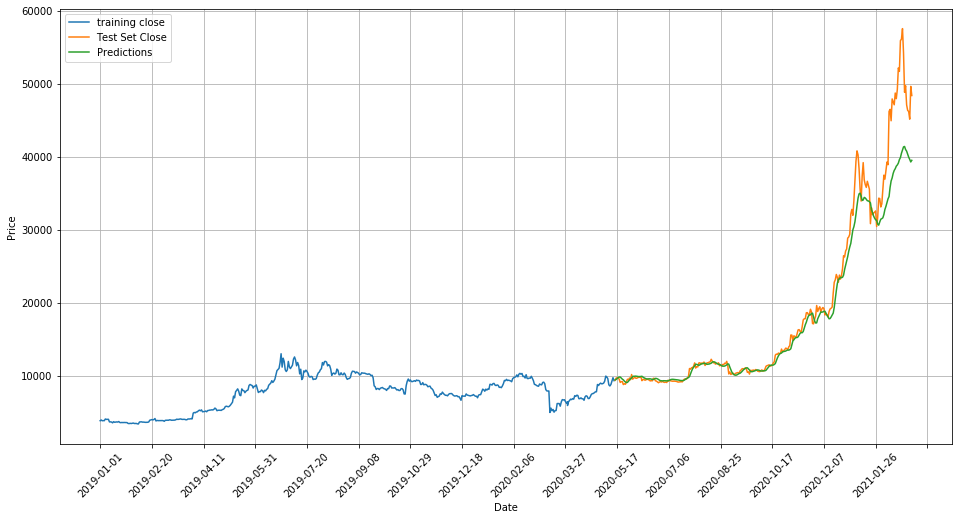

In [36]:
# 2.4.8 LSTM Forecast Plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['LSTM_Predict'] = closing_priceL
plt.plot(BTC_train['BTC_Close'],label='training close')
plt.plot(BTC_test['BTC_Close'],label='Test Set Close')
plt.plot(BTC_test['LSTM_Predict'],label='Predictions')
plt.xlabel("Date")

plt.ylabel("Price") 
ax.grid(True)
plt.legend(loc='best')
plt.show()


In [37]:
##Correlation between the predicted via LSTM and the actual 
corr_LSTM = np.corrcoef(BTC_test['LSTM_Predict'].dropna().values, BTC_test['BTC_Close'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_AdjClosing', 'LSTM_Predict',corr_LSTM))

correlation between test_BTC_AdjClosing and LSTM_Predict is 0.988069


### MOVING AVERAGE MODEL ###

In [38]:
## Lets implement MOving average algorithm

preds = []
for i in range(0,BTC_test.shape[0]):
    a = BTC_train['BTC_Close'][len(BTC_train)-122+i:].sum() + sum(preds)
    b = a/122
    preds.append(b)

In [42]:
## RMSE for moving average model

rms=np.sqrt(np.mean(np.power((np.array(BTC_test['BTC_Close'])-preds),2)))
print('rmse on test set is :', rms)

rmse on test set is : 8474.428133812266


In [44]:
##MAPE for moving average model

mape=np.mean(np.abs(preds - BTC_test['BTC_Close'].values)/np.abs(BTC_test['BTC_Close'].values))
mape

0.25197974701068854

In [45]:
##MPE for moving average model

mpe = np.mean((preds - BTC_test['BTC_Close'].values)/BTC_test['BTC_Close'].values)
mpe

-0.25197974701068854

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

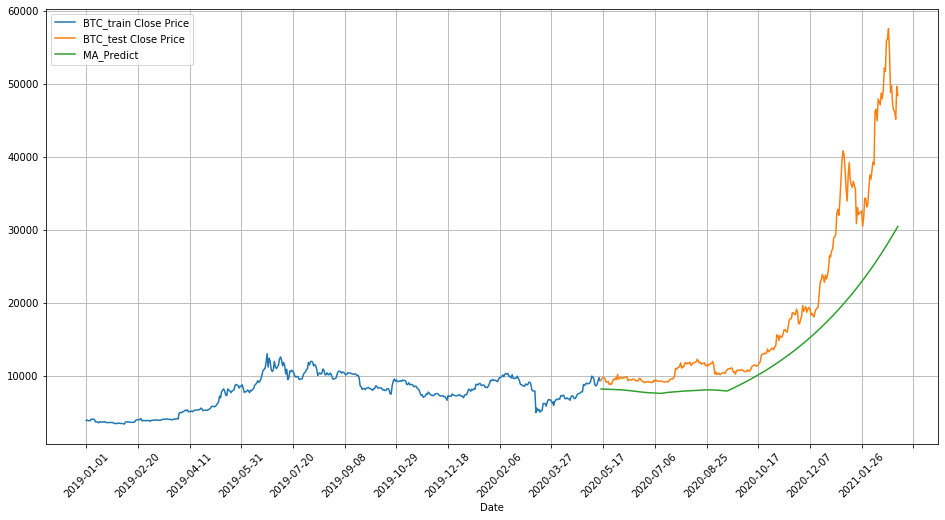

In [46]:
## moving average model Forecast plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['MA_Predict'] = 0
BTC_test['MA_Predict'] = preds
plt.plot(BTC_train['BTC_Close'],label='BTC_train Close Price')
plt.plot(BTC_test['BTC_Close'],label='BTC_test Close Price')
plt.plot(BTC_test['MA_Predict'],label='MA_Predict')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

### ARTIFICIAL NEURAL NET ###

In [47]:
## Lets implement ANN Network
## Train and test data for the ANN
np.random.seed(0)
x_trainB, y_trainB = [], []
for i in range(80,len(BTC_train)):
    x_trainB.append(scaled_data[i-80:i,0])
    y_trainB.append(scaled_data[i,0])
x_trainB, y_trainB = np.array(x_trainB), np.array(y_trainB)

x_trainB = np.reshape(x_trainB, (x_trainB.shape[0],x_trainB.shape[1]))


In [48]:
x_trainB.shape

(420, 80)

In [49]:
#Model init

modelB = Sequential()
modelB.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 80))
np.random.seed(0)
modelB.add(Dense(units =13, kernel_initializer = 'uniform', activation      = 'relu'))
modelB.add(Dense(units = 1, kernel_initializer = 'uniform', activation        = 'sigmoid'))
modelB.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics 
         = ['accuracy'])
modelB.fit(x_trainB, y_trainB, batch_size = 1, epochs = 13,verbose=2)

Epoch 1/13
 - 0s - loss: 0.0411 - accuracy: 0.0000e+00
Epoch 2/13
 - 0s - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 3/13
 - 0s - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 4/13
 - 0s - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 5/13
 - 0s - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 6/13
 - 0s - loss: 5.8796e-04 - accuracy: 0.0000e+00
Epoch 7/13
 - 0s - loss: 3.9142e-04 - accuracy: 0.0000e+00
Epoch 8/13
 - 0s - loss: 3.2182e-04 - accuracy: 0.0000e+00
Epoch 9/13
 - 0s - loss: 2.6001e-04 - accuracy: 0.0000e+00
Epoch 10/13
 - 0s - loss: 2.3528e-04 - accuracy: 0.0000e+00
Epoch 11/13
 - 0s - loss: 2.0539e-04 - accuracy: 0.0000e+00
Epoch 12/13
 - 0s - loss: 1.7865e-04 - accuracy: 0.0000e+00
Epoch 13/13
 - 0s - loss: 1.6638e-04 - accuracy: 0.0000e+00


In [50]:
print(modelB.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                1053      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
inputsB = BTC_DATA[len(BTC_DATA) - len(BTC_test) - 80:].values
inputsB = inputsB.reshape(-1,1)
inputsB  = scaler.transform(inputsB)

In [56]:
X_testB = []
for i in range(80,inputsB.shape[0]):
    X_testB.append(inputsB[i-80:i,0])
X_testB = np.array(X_testB)
print(X_testB.shape)
X_testB = np.reshape(X_testB, (X_testB.shape[0],X_testB.shape[1]))
X_testB.shape
closing_priceB = modelB.predict(X_testB)
closing_priceB = scaler.inverse_transform(closing_priceB)

(288, 80)


In [58]:
##RMSE for NN model

RMS=np.sqrt(np.mean(np.power((BTC_test['BTC_Close'].values-closing_priceB),2)))
RMS

14053.545922578884

In [59]:
##MAPE for the ANN model

MAPE = np.mean(np.abs(closing_priceB - BTC_test['BTC_Close'].values)/np.abs(BTC_test['BTC_Close'].values))
MAPE

0.39087917946600814

In [60]:
##MPE for the ANN model

MPE = np.mean((closing_priceB - BTC_test['BTC_Close'].values)/BTC_test['BTC_Close'].values)
MPE

-0.06287715002774799

In [ ]:
##ANN Model plot

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
BTC_test['ANN_Predict'] = closing_priceB
plt.plot(BTC_train['BTC_Close'],label='BTC_TRAINING_close')
plt.plot(BTC_test['BTC_Close'],label='BTC_TEST_close')
plt.plot(BTC_test['ANN_Predict'],label='ANN_predict')
plt.xlabel("Date")
 
plt.ylabel("Price") 
ax.grid(True)
plt.legend(loc='best')
plt.show()

In [63]:
##Correlation between the predicted via ANN and the actual 

corr_ANN = np.corrcoef(BTC_test['ANN_Predict'].dropna().values, BTC_test['BTC_Close'].dropna().values)[0,1] 

print('correlation between %s and %s is %f'%('test_BTC_Close', 'ANN_Predict',corr_ANN))

correlation between test_BTC_Close and ANN_Predict is 0.775579


OF the three models the best model is LSTM with highest correlation between our results and the closing price. 

Let us use this same model for the ETHEREUM cypto currency.

In [70]:
ETH_Close=eth['Adj Close']
ETH_Close = pd.DataFrame(eth['Adj Close'])
ETH_Close.rename(columns = {'Adj Close':'ETH_Close'}, inplace = True) 

ETH_Close.index = eth['Date']

In [72]:
##split into train and validation/testing
ETH_train =ETH_Close[:550]
ETH_test = ETH_Close[550:]

print(ETH_train.shape)
print(ETH_test.shape)

(550, 1)
(238, 1)


In [74]:
np.random.seed(0)
##2.9b converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ETH_Close)

In [75]:
##2.9c setting training and testing range
x_trainE, y_trainE = [], []
for i in range(80,len(ETH_train)):
    x_trainE.append(scaled_data[i-80:i,0])
    y_trainE.append(scaled_data[i,0])
x_trainE, y_traine = np.array(x_trainE), np.array(y_trainE)

x_trainE = np.reshape(x_trainE, (x_trainE.shape[0],x_trainE.shape[1],1))

x_trainE.shape

(470, 80, 1)

In [76]:
modelE = Sequential()
modelE.add(LSTM(units=13, return_sequences=True, input_shape=(x_trainE.shape[1],1)))
modelE.add(LSTM(units=3))
modelE.add(Dense(1))

modelE.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
modelE.fit(x_trainE, y_trainE, epochs=13, batch_size=1, verbose=2)

Epoch 1/13
 - 19s - loss: 2.6418e-04 - accuracy: 0.0000e+00
Epoch 2/13
 - 19s - loss: 1.7300e-04 - accuracy: 0.0000e+00
Epoch 3/13
 - 18s - loss: 1.3753e-04 - accuracy: 0.0000e+00
Epoch 4/13
 - 19s - loss: 1.1025e-04 - accuracy: 0.0000e+00
Epoch 5/13
 - 18s - loss: 9.8960e-05 - accuracy: 0.0000e+00
Epoch 6/13
 - 18s - loss: 9.5496e-05 - accuracy: 0.0000e+00
Epoch 7/13
 - 18s - loss: 8.3969e-05 - accuracy: 0.0000e+00
Epoch 8/13
 - 18s - loss: 8.3976e-05 - accuracy: 0.0000e+00
Epoch 9/13
 - 18s - loss: 8.0599e-05 - accuracy: 0.0000e+00
Epoch 10/13
 - 18s - loss: 7.4794e-05 - accuracy: 0.0000e+00
Epoch 11/13
 - 18s - loss: 6.8524e-05 - accuracy: 0.0000e+00
Epoch 12/13
 - 18s - loss: 6.5968e-05 - accuracy: 0.0000e+00
Epoch 13/13
 - 18s - loss: 6.6917e-05 - accuracy: 0.0000e+00


In [85]:
ModE = ETH_Close[len(ETH_Close) - len(ETH_test) - 80:].values
ModE = ModE.reshape(-1,1)
ModE  = scaler.transform(ModE)

In [86]:
print(modelE.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 80, 13)            780       
_________________________________________________________________
lstm_4 (LSTM)                (None, 3)                 204       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 988
Trainable params: 988
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
##Testing
X_testE = []
for i in range(80,ModE.shape[0]):
    X_testE.append(ModE[i-80:i,0])
X_testE = np.array(X_testE)
print(X_testE.shape)
X_testE = np.reshape(X_testE, (X_testE.shape[0],X_testE.shape[1],1))
closing_priceE = model.predict(X_testE)
closing_priceE = scaler.inverse_transform(closing_priceE)

(238, 80)


In [88]:
##RMSE for ETH

rms=np.sqrt(np.mean(np.power((ETH_test['ETH_Close'].values-closing_priceE),2)))
rms

608.2734467561844

In [89]:
##MAPE for ETH

mape = np.mean(np.abs(closing_priceE - ETH_test['ETH_Close'].values)/np.abs(ETH_test['ETH_Close'].values))
mape

0.7140665009489563

In [90]:
##MPE for ETH
mpe = np.mean((closing_priceE - ETH_test['ETH_Close'].values)/ETH_test['ETH_Close'].values)
mpe

0.28899200127229296

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


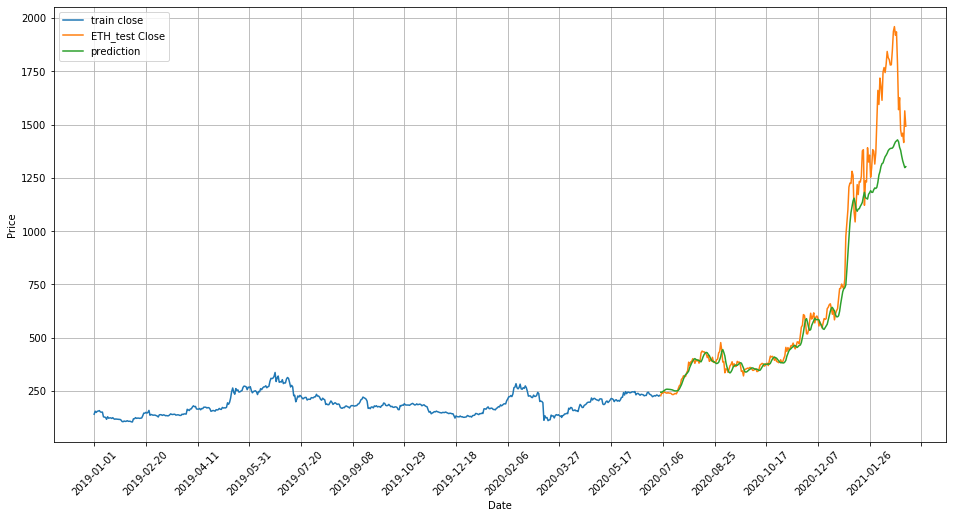

In [91]:
##LSTM  Model Forecast plot for ETH

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ETH_test['Predictions'] = closing_priceE
plt.plot(ETH_train['ETH_Close'],label='train close')
plt.plot(ETH_test['ETH_Close'],label='ETH_test Close')
plt.plot(ETH_test['Predictions'],label='prediction')
plt.xlabel("Date")

plt.ylabel("Price") 

ax.grid(True)
plt.legend(loc='best')
plt.show()